See how much unresolved star light is in each pixel

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.utils import getPackageDir
import os


In [2]:
pix_size = 12.*3600. # sq arcsec

In [4]:
mapDir =  os.path.join(getPackageDir('sims_maps'),'StarMaps')

In [5]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
mu_maps= {}
pix_mag_maps = {}
for filterName in filters:

    # Load up the data, copy the keys into variables
    data = np.load(os.path.join(mapDir, 'starDensity_%s_nside_64.npz' % filterName))
    # Cumulative number counts, units of stars/sq deg. Array at healpix locations
    starDensity = data['starDensity'].copy()
    # magnitude bins 
    bins=data['bins'].copy()
    # pixels where there were so many stars some were skipped
    mask = data['overMaxMask']
    data.close()
    
    flux_per_sqdeg = np.zeros(starDensity.shape[0])
    zp = -2.5*np.log10(3631)
    bin_flux = np.power(10.0, -0.4*(bins[:-1]+zp))
    # Loop over each healpixel and compute the stellar flux per sq degree
    for i,pix in enumerate(flux_per_sqdeg):
        nstars_bin = starDensity[i,:]
        # undo the cumulative nature
        nstars_bin[1:] = nstars_bin[1:] - nstars_bin[0:-1]
        flux_per_sqdeg[i] = np.sum(nstars_bin*bin_flux)
    flux_per_arcsec = flux_per_sqdeg/3600./3600.
    flux_per_pix = flux_per_arcsec*pix_size
    mag_per_pix = -2.5*np.log10(flux_per_pix) - zp
    mag_per_arcsec = -2.5*np.log10(flux_per_arcsec) - zp
    mu_maps[filterName] = mag_per_arcsec
    pix_mag_maps[filterName] = mag_per_pix
    #hp.mollview(mag_per_arcsec, min=22, max=27, title='Stellar Background, %s' % filterName, unit='mag/sq arcsec')

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log10


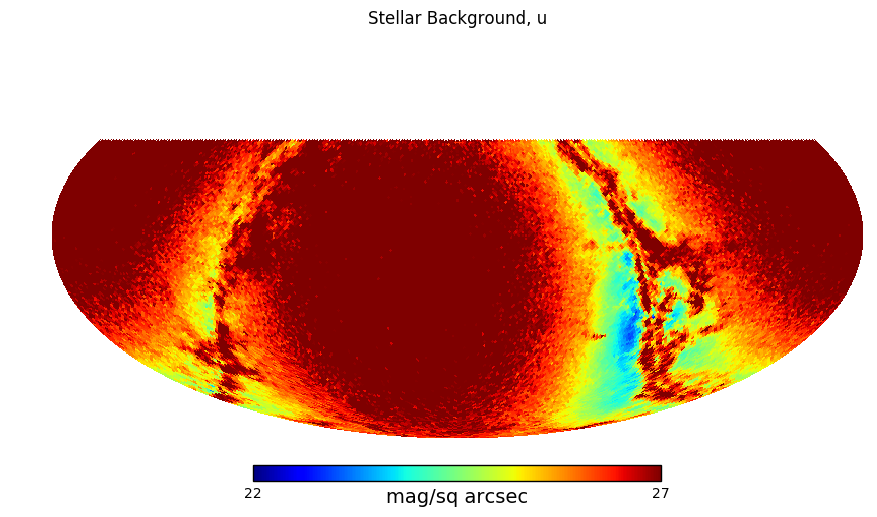

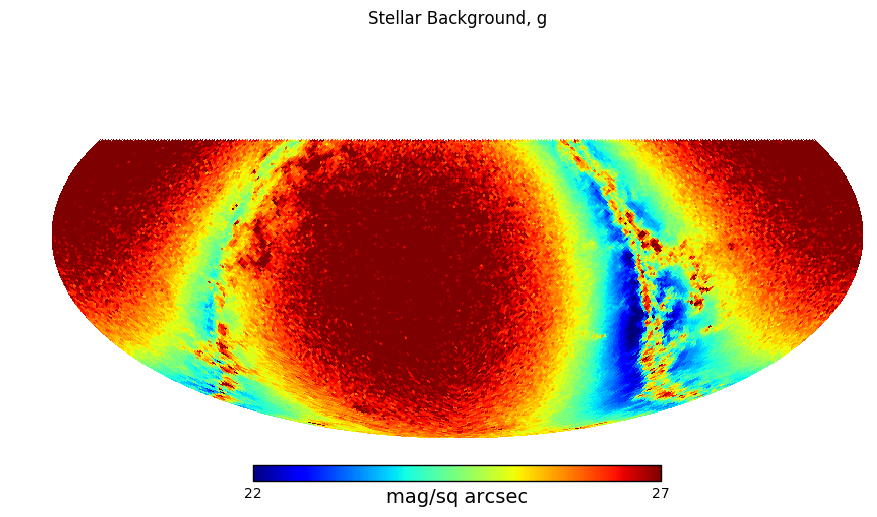

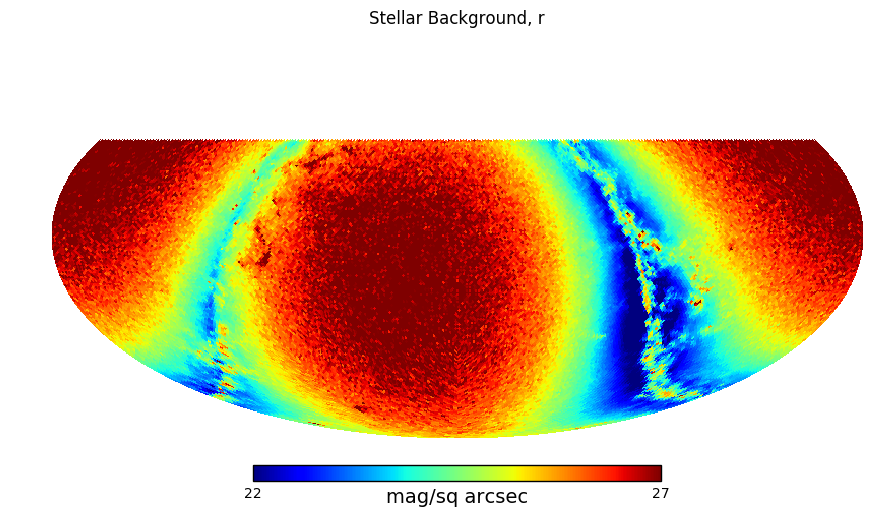

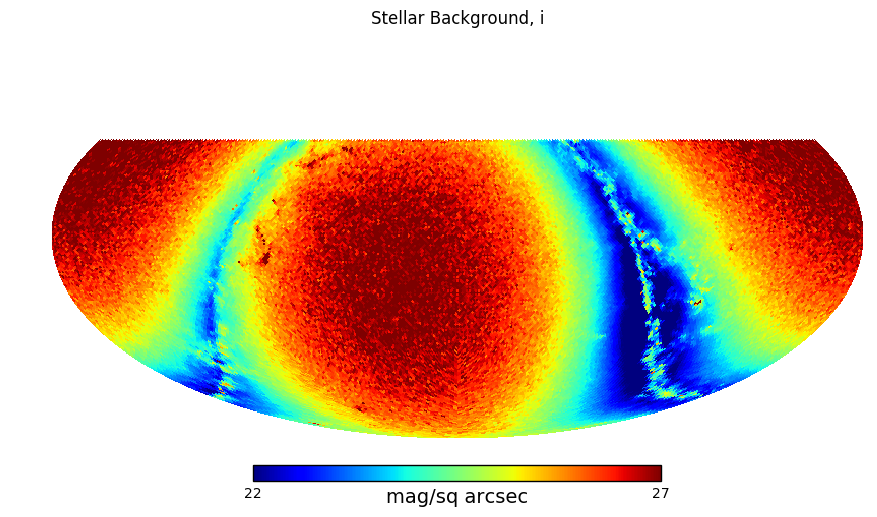

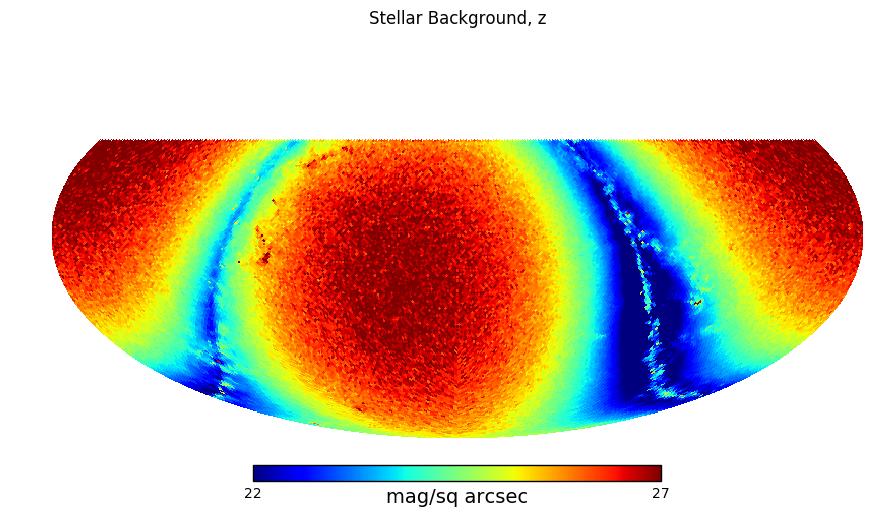

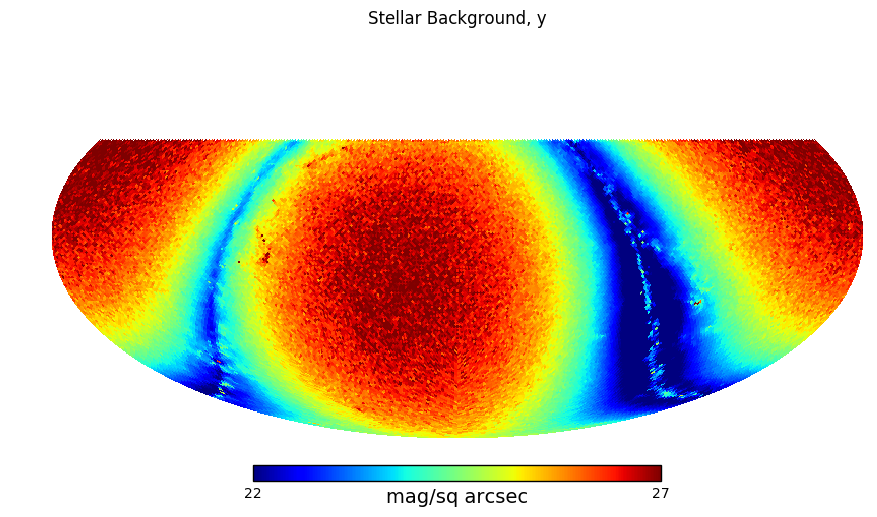

In [6]:
for filterName in filters:
    hp.mollview(mu_maps[filterName], min=22, max=27, title='Stellar Background, %s' % filterName, unit='mag/sq arcsec')
    

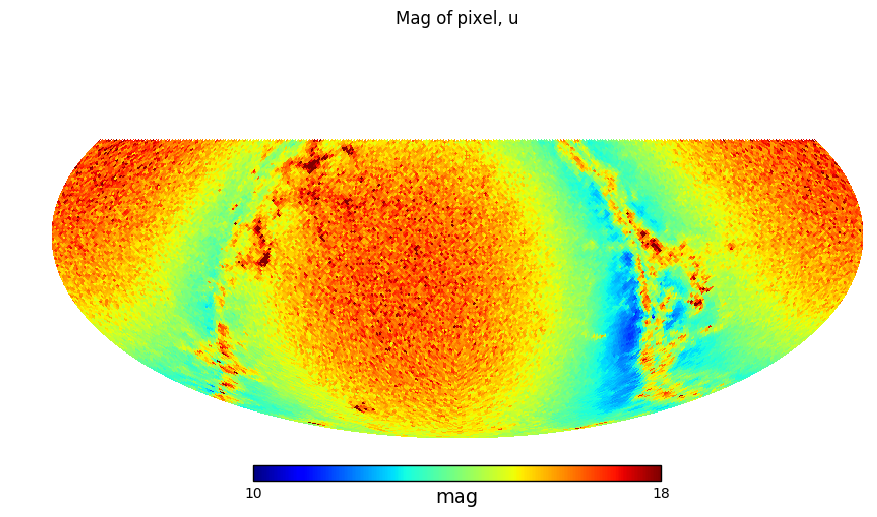

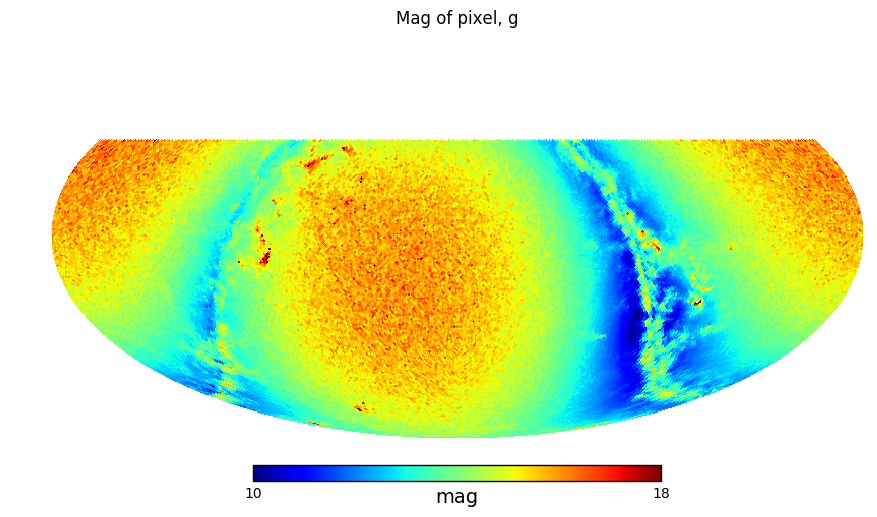

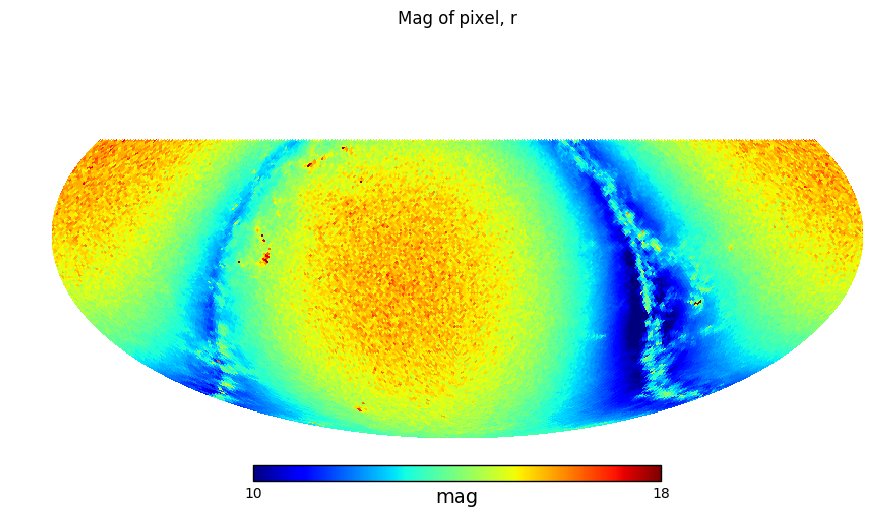

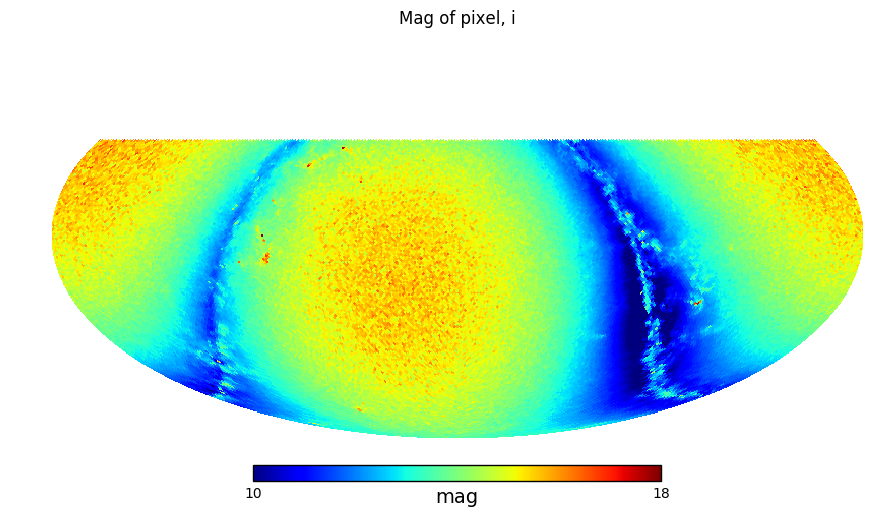

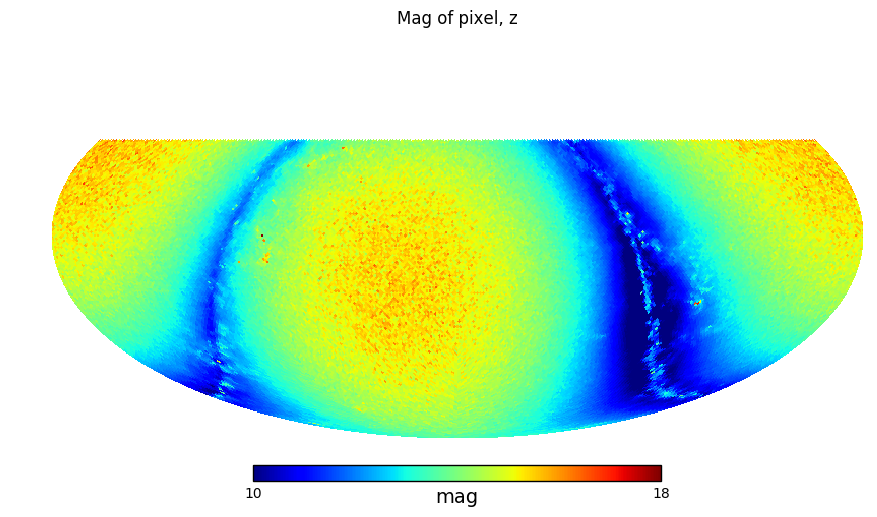

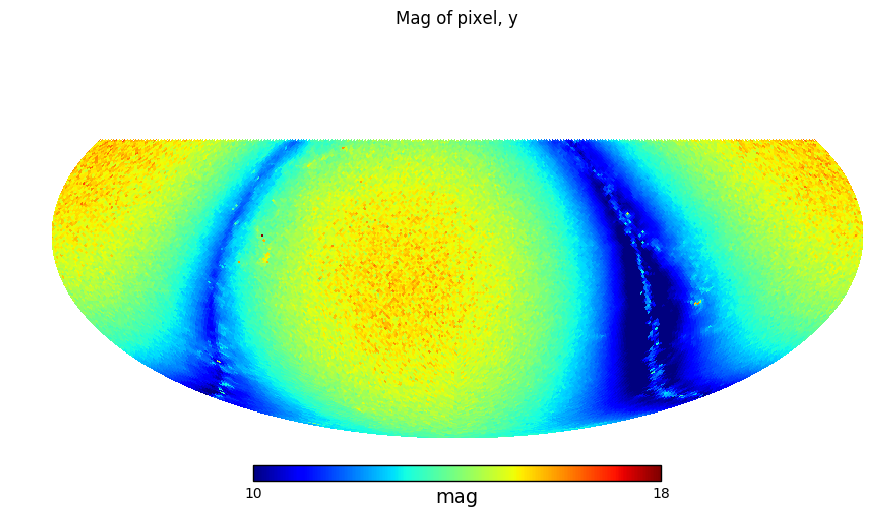

In [7]:
for filterName in filters:
    hp.mollview(pix_mag_maps[filterName], title='Mag of pixel, %s' % filterName, unit='mag', min=10, max=18)
